# !WARNING!

In the original study, participants were shown a pair of faces in each trial: one face masculinised and one feminised. They then had to choose their preferred face. Which side the masculinised face was on (left or right) was randomised between trials.

In these notebooks, this dataset was analysed under the false assumption that the variable "side_of_response" corresponds to the participants choice of the "left" or "right" face, and therefore needed firstly to be mapped to a new variable, indicating whether the participant chose a masculine or feminine face - variable: "chose_masc". The mapping to "chose_masc" was created by viewing the masculinised/feminised images (not provided) to see which side (left or right) corresponded to the masculine or feminine.

**However the variable "side_of_response" (left=0, right=1) actually already corresponds to the variable "participant chose masculinised face" (feminised=0, masculinised=1).** Therefore the 3 analyses in the notebooks:  
* 0.1 Cleaning and Exploring Data (WRONG DATA).ipynb
* 0.2 Testing priming group independence (WRONG DATA).ipynb
* 0.3 Masculinity over 'time' (WRONG DATA).ipynb  

Are working with incorrectly interpreted data, and thus their analyses are also incorrect. 

The correct dataset and analyses are included in the notebooks:
* 1. Cleaning and Exploring Data.ipynb
* 2. Masculinity preferences by priming group.ipynb
* 3. Masculinity over 'time'.ipynb  
* 4. Modelling the data.ipynb

However these original incorrect notebooks are included within the project files for transparency, and to discourage similar mistakes being made by others re-using the dataset!

## Importing the data

In [1]:
import pandas as pd
from itertools import combinations

In [2]:
data = pd.read_csv("../Main Study (Face)/main_study_face_data.csv")

## Pre-processing the data

In [3]:
# renaming the columns to make their meanings clearer!
data.columns = ["participant_id", "trial_number", "pre_post_prime", "side_of_response", "image", "prime_condition"]

In [4]:
# removing the faces subdirectory from the string
data["image"] = data["image"].str[6:]

In [5]:
data

,participant_id,trial_number,pre_post_prime,side_of_response,image,prime_condition
0,11,2,0,0,Slide11.bmp,1
1,11,3,0,1,Slide9.bmp,1
2,11,4,0,0,Slide5.bmp,1
3,11,5,0,1,Slide1.bmp,1
4,11,6,0,1,Slide18.bmp,1
...,...,...,...,...,...,...
12659,75b,36,1,1,Slide20.bmp,5
12660,75b,37,1,1,Slide2.bmp,5
12661,75b,38,1,1,Slide10.bmp,5
12662,75b,39,1,0,Slide14.bmp,5


### Coding the masculinity choices into the dataset

In [6]:
# indicating which side of the images is masculine 
# (1 means the right side of the image is masculine, 0 means the left side of the image is masculine)
slides_to_masc = {}
for key in ["Slide1.bmp", "Slide3.bmp", "Slide5.bmp", "Slide7.bmp", "Slide9.bmp",
           "Slide12.bmp", "Slide14.bmp", "Slide16.bmp", "Slide18.bmp", "Slide20.bmp"]:
    slides_to_masc[key] = 1 # right side
for key in ["Slide2.bmp", "Slide4.bmp", "Slide6.bmp", "Slide8.bmp", "Slide10.bmp",
           "Slide11.bmp", "Slide13.bmp", "Slide15.bmp", "Slide17.bmp", "Slide19.bmp"]:
    slides_to_masc[key] = 0 # left side

In [7]:
# creating a new column that defines which side of the image is masculine
data["masc_side"] = data["image"].map(slides_to_masc)

In [8]:
# boolean variable indicating whether the participant chose the masculine side
data["chose_masc"] = data["side_of_response"] == data["masc_side"]

In [9]:
data

,participant_id,trial_number,pre_post_prime,side_of_response,image,prime_condition,masc_side,chose_masc
0,11,2,0,0,Slide11.bmp,1,0,True
1,11,3,0,1,Slide9.bmp,1,1,True
2,11,4,0,0,Slide5.bmp,1,1,False
3,11,5,0,1,Slide1.bmp,1,1,True
4,11,6,0,1,Slide18.bmp,1,1,True
...,...,...,...,...,...,...,...,...
12659,75b,36,1,1,Slide20.bmp,5,1,True
12660,75b,37,1,1,Slide2.bmp,5,0,False
12661,75b,38,1,1,Slide10.bmp,5,0,False
12662,75b,39,1,0,Slide14.bmp,5,1,False


## Exploring the data

### An overview of the dataset and any missing data

In [10]:
# There are no cells with missing data
data.isna().sum()

participant_id      0
trial_number        0
pre_post_prime      0
side_of_response    0
image               0
prime_condition     0
masc_side           0
chose_masc          0
dtype: int64

In [11]:
# looking at the contents of each variable - is there anything unexpected?
# the contents of all of the variables seems reasonable
data.apply(lambda x: x.unique())

participant_id      [11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 2...
trial_number        [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
pre_post_prime                                                 [0, 1]
side_of_response                                               [0, 1]
image               [Slide11.bmp, Slide9.bmp, Slide5.bmp, Slide1.b...
prime_condition                                       [1, 2, 3, 4, 5]
masc_side                                                      [0, 1]
chose_masc                                              [True, False]
dtype: object

In [12]:
# there are 331 participants, 
# who each should have taken part in 40 trials, 
# where they were shown the same 20 images 
# both before and after being exposed to one of the 5 priming conditions
data.apply(lambda x: x.nunique())

# number of unique values

participant_id      331
trial_number         40
pre_post_prime        2
side_of_response      2
image                20
prime_condition       5
masc_side             2
chose_masc            2
dtype: int64

In [13]:
# roughly the same number of participants were assigned to each of the priming conditions
data.groupby("prime_condition")["participant_id"].nunique()

prime_condition
1    68
2    67
3    64
4    68
5    64
Name: participant_id, dtype: int64

### Exploring the images in the dataset

In [14]:
# Some of the images in particular tended to have a very high percetnage of people preferring the masculine side
# other slides had a strong preference to the feminine side (regardless/aggregating over all of the priming conditions)
# This very high amount of variation could have been influential
(data.groupby("image")["chose_masc"].sum() / data.groupby("image")["chose_masc"].count() * 100).sort_values(ascending=False)

image
Slide9.bmp     82.198142
Slide5.bmp     77.637795
Slide7.bmp     70.216049
Slide10.bmp    69.375000
Slide19.bmp    66.720257
Slide12.bmp    66.406250
Slide18.bmp    63.751987
Slide11.bmp    62.757528
Slide14.bmp    62.439807
Slide13.bmp    59.126365
Slide20.bmp    56.045752
Slide8.bmp     51.321928
Slide17.bmp    49.921997
Slide1.bmp     48.330684
Slide16.bmp    46.570973
Slide3.bmp     44.051447
Slide2.bmp     43.789809
Slide6.bmp     40.654206
Slide4.bmp     37.147335
Slide15.bmp    27.910686
Name: chose_masc, dtype: float64

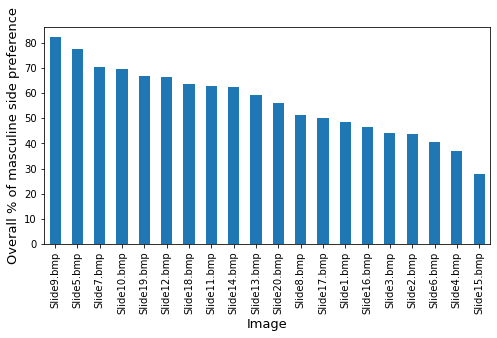

In [15]:
ax = (data.groupby("image")["chose_masc"].sum() / data.groupby("image")["chose_masc"].count() * 100).sort_values(ascending=False).plot.bar(figsize=(8, 4))
ax.set_xlabel("Image", size=13)
ax.set_ylabel("Overall % of masculine side preference", size=13);

In [16]:
# were all of the participants shown all of the images? Each participant should have been shown 20 images.
# 16 participants were only shown 19 images, not all 20
num_images_shown = data.groupby("participant_id")["image"].nunique()
num_images_shown[num_images_shown < 20]

participant_id
123    19
130    19
138    19
14     19
155    19
162    19
183    19
245    19
274    19
30     19
42     19
45     19
48     19
61     19
83     19
88     19
Name: image, dtype: int64

In [17]:
# only looking at the participants who were shown <20 images
participants_with_19_images = data[data["participant_id"].isin(list(num_images_shown[num_images_shown < 20].index))]

In [18]:
# different participants missed seeing different images
all_images = set(data["image"].unique())
for participant_id, images in zip(list(participants_with_19_images.groupby("participant_id")["image"].unique().index),
                                  participants_with_19_images.groupby("participant_id")["image"].unique()):
    print(participant_id, "has missing image:", all_images - set(images))

123 has missing image: {'Slide20.bmp'}
130 has missing image: {'Slide19.bmp'}
138 has missing image: {'Slide15.bmp'}
14 has missing image: {'Slide17.bmp'}
155 has missing image: {'Slide20.bmp'}
162 has missing image: {'Slide9.bmp'}
183 has missing image: {'Slide18.bmp'}
245 has missing image: {'Slide9.bmp'}
274 has missing image: {'Slide2.bmp'}
30 has missing image: {'Slide1.bmp'}
42 has missing image: {'Slide19.bmp'}
45 has missing image: {'Slide2.bmp'}
48 has missing image: {'Slide14.bmp'}
61 has missing image: {'Slide1.bmp'}
83 has missing image: {'Slide10.bmp'}
88 has missing image: {'Slide15.bmp'}


### Exploring the trials in the dataset

In [19]:
# looking at the number of trials each participant took part in
# many participants did not take place in all of the trials!
num_trials_completed = data.groupby("participant_id")["trial_number"].nunique()
num_trials_completed[num_trials_completed < 40]

participant_id
100     35
100b    35
102     39
103     39
105     39
        ..
92      36
93      39
96      37
98      37
99      38
Name: trial_number, Length: 253, dtype: int64

In [20]:
# only 78 participants completed all 40 trials, 253 participants did not
num_trials_completed.value_counts().sort_index(ascending=False)

40     78
39    109
38     61
37     43
36     19
35      8
34      1
33      8
31      2
30      2
Name: trial_number, dtype: int64

In [21]:
# which different trials are the participants missing?
participants_with_less_images = data[data["participant_id"].isin(list(num_trials_completed[num_trials_completed < 40].index))]
all_trials = set(data["trial_number"].unique())
all_missing_trials = []
for participant_id, trials in zip(list(participants_with_less_images.groupby("participant_id")["trial_number"].unique().index),
                                  participants_with_less_images.groupby("participant_id")["trial_number"].unique()):
    print(participant_id, "has missing trial(s):", all_trials-set(trials))
    for trial in all_trials-set(trials):
        all_missing_trials.append(trial)

100 has missing trial(s): {6, 39, 7, 19, 21}
100b has missing trial(s): {6, 39, 7, 19, 21}
102 has missing trial(s): {1}
103 has missing trial(s): {34}
105 has missing trial(s): {29}
107 has missing trial(s): {4}
108 has missing trial(s): {1, 4}
11 has missing trial(s): {1}
110 has missing trial(s): {1}
111 has missing trial(s): {1, 3, 4, 18, 29}
112 has missing trial(s): {1, 4, 17}
114 has missing trial(s): {7}
115 has missing trial(s): {1, 5}
118 has missing trial(s): {9, 37, 6}
11b has missing trial(s): {1}
12 has missing trial(s): {1}
123 has missing trial(s): {32, 12, 22}
124 has missing trial(s): {1, 3, 5, 11, 16, 17, 23, 28, 29, 31}
125 has missing trial(s): {29}
127 has missing trial(s): {34}
128 has missing trial(s): {1}
129 has missing trial(s): {16, 1}
13 has missing trial(s): {1}
130 has missing trial(s): {26, 19, 22, 39}
131 has missing trial(s): {25, 26}
132 has missing trial(s): {38}
134 has missing trial(s): {15}
137 has missing trial(s): {18, 27, 12}
138 has missing tr

In [22]:
# trials 1-20 occurred before priming, 21-40 occurred after priming
# thus we can see that participants are missing a mix of trials before and after priming

In [23]:
data[data["trial_number"].isin(list(range(1, 21)))]["pre_post_prime"].unique()

array([0], dtype=int64)

In [24]:
data[data["trial_number"].isin(list(range(21, 40)))]["pre_post_prime"].unique()

array([1], dtype=int64)

In [25]:
# exploring one example with a higher number of missing trials, participant 124
data[data["participant_id"]=="124"]

,participant_id,trial_number,pre_post_prime,side_of_response,image,prime_condition,masc_side,chose_masc
4233,124,2,0,1,Slide7.bmp,4,1,True
4234,124,4,0,1,Slide2.bmp,4,0,False
4235,124,6,0,0,Slide1.bmp,4,1,False
4236,124,7,0,0,Slide20.bmp,4,1,False
4237,124,8,0,1,Slide12.bmp,4,1,True
4238,124,9,0,1,Slide4.bmp,4,0,False
4239,124,10,0,0,Slide10.bmp,4,0,True
4240,124,12,0,0,Slide13.bmp,4,0,True
4241,124,13,0,0,Slide8.bmp,4,0,True
4242,124,14,0,0,Slide16.bmp,4,1,False


In [26]:
data[data["participant_id"]=="124"]["pre_post_prime"].value_counts()

1    16
0    14
Name: pre_post_prime, dtype: int64

In [27]:
# in the both the specific example and in general
# there are more trial responses post prime (1) than pre prime (0)
data["pre_post_prime"].value_counts()

1    6447
0    6217
Name: pre_post_prime, dtype: int64

In [28]:
# The trials are likely missing because there was a timer on the responses
# this also explains why more trials are missing pre-prime, as participants were newer/less confident to the study
# trial 1 is missed a lot - this makes sense, as it was the first trial in the study
# there is a spike at trial 21 - because this marks the start of the next set of trials after priming

Text(0, 0.5, 'Number of missed trials')

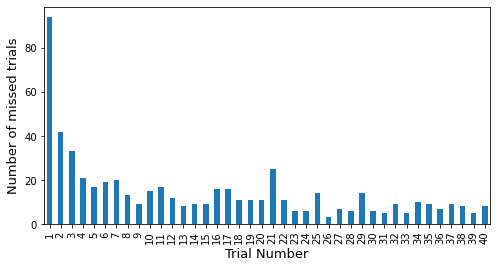

In [29]:
# a bar chart with the missing trial number on the x axis, and frequency of being omitted on the y axis
ax = pd.Series(all_missing_trials).value_counts().sort_index().plot.bar(figsize=(8, 4))
ax.set_xlabel("Trial Number", size=13)
ax.set_ylabel("Number of missed trials", size=13)

### The "b" participants and duplicates!

In [30]:
# looking at each unique participant
# what do the "b" participants mean? Does the "b" have any significance?
data["participant_id"].unique()

array(['11', '12', '13', '14', '15', '16', '17', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
       '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101',
       '102', '103', '104', '105', '106', '107', '108', '109', '110',
       '111', '112', '113', '114', '115', '116', '117', '118', '119',
       '120', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '130', '131', '132', '133', '134', '135', '136', '137',
       '138', '139', '140', '141', '142', '143', '144', '145', '146',
       '147', '148', '149', '150', '151', '152', '153', '154', '

In [31]:
# creating a list of all the participants with "b" in their name, and "no b" in their name, but the same number
all_b_participants = [p_id for p_id in list(data["participant_id"].unique()) if "b" in p_id]
b_participants_pairs = [p_id[:-1] for p_id in all_b_participants]

In [32]:
# all of the "b" participants have exactly the same data results as their equivalent non-b participants!
duplicate_participants = []
for b_id, p_id in zip(all_b_participants, b_participants_pairs):
    if p_id in data["participant_id"].unique():
        print("Participants", b_id, "and", p_id, "have matching data:",
              (data[data["participant_id"]==b_id].iloc[:, 1:].values == data[data["participant_id"]==p_id].iloc[:, 1:].values).all())
        duplicate_participants.append(b_id)
    else:
        print("Participant", b_id, "does not match", p_id)

Participants 100b and 100 have matching data: True
Participants 11b and 11 have matching data: True
Participants 13b and 13 have matching data: True
Participants 144b and 144 have matching data: True
Participants 146b and 146 have matching data: True
Participants 147b and 147 have matching data: True
Participants 150b and 150 have matching data: True
Participants 156b and 156 have matching data: True
Participants 15b and 15 have matching data: True
Participants 170b and 170 have matching data: True
Participants 174b and 174 have matching data: True
Participants 17b and 17 have matching data: True
Participants 184b and 184 have matching data: True
Participants 188b and 188 have matching data: True
Participants 191b and 191 have matching data: True
Participants 196b and 196 have matching data: True
Participants 19b and 19 have matching data: True
Participants 201b and 201 have matching data: True
Participants 203b and 203 have matching data: True
Participants 207b and 207 have matching d

In [33]:
# checking every single participant combination for matching data - only the "b" participants have matching data
all_pids = list(data["participant_id"].unique())
all_combs = combinations(all_pids, 2)
for ids in all_combs:
    id1 = ids[0]
    id2 = ids[1]
    id1_array = data[data["participant_id"]==id1].iloc[:, 1:].values
    id2_array = data[data["participant_id"]==id2].iloc[:, 1:].values
    if (id1 != id2) and (id1_array.shape == id2_array.shape) and ((id1_array == id2_array).all()):
        print("Participants", id1, "and", id2, "have matching data.")

Participants 11 and 11b have matching data.
Participants 13 and 13b have matching data.
Participants 15 and 15b have matching data.
Participants 17 and 17b have matching data.
Participants 19 and 19b have matching data.
Participants 66 and 66b have matching data.
Participants 75 and 75b have matching data.
Participants 100 and 100b have matching data.
Participants 144 and 144b have matching data.
Participants 146 and 146b have matching data.
Participants 147 and 147b have matching data.
Participants 150 and 150b have matching data.
Participants 156 and 156b have matching data.
Participants 170 and 170b have matching data.
Participants 174 and 174b have matching data.
Participants 184 and 184b have matching data.
Participants 188 and 188b have matching data.
Participants 191 and 191b have matching data.
Participants 196 and 196b have matching data.
Participants 201 and 201b have matching data.
Participants 203 and 203b have matching data.
Participants 207 and 207b have matching data.
Pa

In [34]:
# the one c participant is unique
(data[data["participant_id"]=="201"].iloc[:, 1:].values) == (data[data["participant_id"]=="201c"].iloc[:, 1:].values)

C:\Users\Natasha\AppData\Local\Temp\ipykernel_9852\4067561371.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (data[data["participant_id"]=="201"].iloc[:, 1:].values) == (data[data["participant_id"]=="201c"].iloc[:, 1:].values)


False

In [35]:
len(duplicate_participants)

40

In [36]:
len(data["participant_id"].unique())

331

In [37]:
len(data["participant_id"].unique()) - len(duplicate_participants)

291

In [38]:
# exploring the qualities of the "duplicate participants"
only_duplicate_data = data[data["participant_id"].isin(duplicate_participants)]

In [39]:
# the duplicates are generally evenly spread over the priming conditions, and in general statistically seem similar to the overall dataset
only_duplicate_data[~only_duplicate_data.duplicated(subset="participant_id")]["prime_condition"].value_counts()

1    9
2    9
3    8
4    8
5    6
Name: prime_condition, dtype: int64

In [40]:
only_duplicate_data.describe()

,trial_number,pre_post_prime,side_of_response,prime_condition,masc_side
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,20.749836,0.507551,0.529219,2.829284,0.498359
std,11.455039,0.500107,0.499309,1.371671,0.500162
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,11.000000,0.000000,0.000000,2.000000,0.000000
50%,21.000000,1.000000,1.000000,3.000000,0.000000
75%,31.000000,1.000000,1.000000,4.000000,1.000000
max,40.000000,1.000000,1.000000,5.000000,1.000000


In [41]:
data.describe()

,trial_number,pre_post_prime,side_of_response,prime_condition,masc_side
count,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000
mean,20.802827,0.509081,0.554959,2.978364,0.498342
std,11.436135,0.499937,0.496990,1.416336,0.500017
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,11.000000,0.000000,0.000000,2.000000,0.000000
50%,21.000000,1.000000,1.000000,3.000000,0.000000
75%,31.000000,1.000000,1.000000,4.000000,1.000000
max,40.000000,1.000000,1.000000,5.000000,1.000000


In [42]:
# Showing an example of two exactly matching participant data, but with two different participant ids

In [43]:
data[data["participant_id"]=="191"]

,participant_id,trial_number,pre_post_prime,side_of_response,image,prime_condition,masc_side,chose_masc
6790,191,3,0,1,Slide10.bmp,1,0,False
6791,191,4,0,1,Slide5.bmp,1,1,True
6792,191,5,0,0,Slide17.bmp,1,0,True
6793,191,6,0,1,Slide6.bmp,1,0,False
6794,191,8,0,1,Slide2.bmp,1,0,False
6795,191,9,0,0,Slide3.bmp,1,1,False
6796,191,10,0,1,Slide7.bmp,1,1,True
6797,191,11,0,1,Slide15.bmp,1,0,False
6798,191,12,0,1,Slide4.bmp,1,0,False
6799,191,13,0,0,Slide13.bmp,1,0,True


In [44]:
data[data["participant_id"]=="191b"]

,participant_id,trial_number,pre_post_prime,side_of_response,image,prime_condition,masc_side,chose_masc
11565,191b,3,0,1,Slide10.bmp,1,0,False
11566,191b,4,0,1,Slide5.bmp,1,1,True
11567,191b,5,0,0,Slide17.bmp,1,0,True
11568,191b,6,0,1,Slide6.bmp,1,0,False
11569,191b,8,0,1,Slide2.bmp,1,0,False
11570,191b,9,0,0,Slide3.bmp,1,1,False
11571,191b,10,0,1,Slide7.bmp,1,1,True
11572,191b,11,0,1,Slide15.bmp,1,0,False
11573,191b,12,0,1,Slide4.bmp,1,0,False
11574,191b,13,0,0,Slide13.bmp,1,0,True
